In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [3]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
match.shape

(756, 18)

In [5]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
delivery.shape

(179078, 21)

In [7]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

# reset index use to convert in dataframe

In [8]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [9]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [10]:
total_score_df  # total runs shows the target given by the team played first

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [11]:
total_score_df['total_runs'] = total_score_df['total_runs']+1  # here we added 1 to the score of 1st innings because target
total_score_df                      # score is one more than the team score

C:\Users\Vivek\AppData\Local\Temp/ipykernel_10084/3014199625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_score_df['total_runs'] = total_score_df['total_runs']+1  # here we added 1 to the score of 1st innings because target


,match_id,inning,total_runs
0,1,1,208
2,2,1,185
4,3,1,184
6,4,1,164
8,5,1,158
...,...,...,...
1518,11347,1,144
1520,11412,1,137
1522,11413,1,172
1524,11414,1,156


In [12]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [13]:
match_df # here we got how many runs are made in 1st innings of every matches

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,185
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,184
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,164
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,144
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,137
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,172
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,156


## Preprocessing 

In [14]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [15]:
match_df['team1'].nunique()

15

In [16]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]  #only Teams currently playing in IPL

In [17]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals') 
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [18]:
match_df = match_df[match_df['team1'].isin(teams)] 
match_df = match_df[match_df['team2'].isin(teams)]

In [19]:
match_df.shape

(641, 20)

In [20]:
delivery['batting_team'] = delivery['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
delivery['bowling_team'] = delivery['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')

delivery['batting_team'] = delivery['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
delivery['bowling_team'] = delivery['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [21]:
delivery = delivery[delivery['batting_team'].isin(teams)]
delivery = delivery[delivery['bowling_team'].isin(teams)]

#### here we removing the matches which results were declared due to Duckworth–Lewis method

In [22]:
match_df['dl_applied'].value_counts()

0    626
1     15
Name: dl_applied, dtype: int64

In [23]:
match_df = match_df[match_df['dl_applied'] == 0]  ## only matches which results is not due to Duckworth–Lewis method 

In [24]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,179
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,149
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,144
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,137
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,172
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,156


In [25]:
match_df.shape

(626, 20)

In [26]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [27]:
match_df

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,208
4,5,Bangalore,Royal Challengers Bangalore,158
6,7,Mumbai,Mumbai Indians,179
7,8,Indore,Kings XI Punjab,149
9,10,Mumbai,Mumbai Indians,159
...,...,...,...,...
751,11347,Mumbai,Mumbai Indians,144
752,11412,Chennai,Mumbai Indians,137
753,11413,Visakhapatnam,Delhi Capitals,172
754,11414,Visakhapatnam,Chennai Super Kings,156


In [28]:
match_df['match_id'].shape

(626,)

In [29]:
delivery_df = match_df.merge(delivery,on='match_id') # we get the ball by ball data in every match

In [30]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [31]:
delivery_df = delivery_df[delivery_df['inning'] == 2] # get only ball by ball data of second innings

In [32]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [33]:
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']

C:\Users\Vivek\AppData\Local\Temp/ipykernel_10084/3025607697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']


In [34]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,1,0,1,NaN,NaN,NaN,152
149574,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,2,0,2,NaN,NaN,NaN,154
149575,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,1,0,1,SR Watson,run out,KH Pandya,155
149576,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,2,0,2,NaN,NaN,NaN,157


In [35]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

C:\Users\Vivek\AppData\Local\Temp/ipykernel_10084/1162889266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']


In [36]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,207
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,3,205
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,7,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,1,0,1,NaN,NaN,NaN,152,1
149574,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,2,0,2,NaN,NaN,NaN,154,-1
149575,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,1,0,1,SR Watson,run out,KH Pandya,155,-2
149576,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,2,0,2,NaN,NaN,NaN,157,-4


In [37]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball']) # we take 126 because here we start from 1 over
## not from 0 over

C:\Users\Vivek\AppData\Local\Temp/ipykernel_10084/1856749374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball']) # we take 126 because here we start from 1 over


In [38]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,201,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,1,4
149574,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-1,3
149575,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-2,2
149576,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-4,1


In [39]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets'] = 10 - wickets
delivery_df.head(10)

C:\Users\Vivek\AppData\Local\Temp/ipykernel_10084/4252747945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
C:\Users\Vivek\AppData\Local\Temp/ipykernel_10084/4252747945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
C:\Users\Vivek\AppData\Local\Temp/ipykernel_10084/4252747945.py:3: SettingWithCopyWarning: 
A value is 

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,117,10
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,205,116,10
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,201,115,10
130,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,6,Mandeep Singh,...,4,0,4,0,NaN,NaN,11,197,114,10
131,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,CH Gayle,...,0,0,0,0,NaN,NaN,11,197,113,10
132,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,CH Gayle,...,0,0,0,0,NaN,NaN,11,197,112,10
133,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,3,CH Gayle,...,1,0,1,0,NaN,NaN,12,196,111,10
134,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,4,Mandeep Singh,...,0,0,0,0,NaN,NaN,12,196,110,10


In [40]:
delivery_df.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
149573,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,152,1,4,5
149574,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,154,-1,3,5
149575,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,-2,2,4
149576,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,157,-4,1,4
149577,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,...,0,0,0,1,lbw,NaN,157,-4,0,3


In [41]:
 ### crr = runs/overs

In [42]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left']) # to convert balls into over,divide 
## balls by 6

C:\Users\Vivek\AppData\Local\Temp/ipykernel_10084/3086594064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left']) # to convert balls into over,divide


In [43]:
delivery_df['crr']

125       6.000000
126       3.000000
127       2.000000
128       4.500000
129       8.400000
            ...   
149573    7.862069
149574    7.897436
149575    7.881356
149576    7.915966
149577    7.850000
Name: crr, Length: 72413, dtype: float64

In [44]:
### rrr = runs_left/overs_left

In [45]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

C:\Users\Vivek\AppData\Local\Temp/ipykernel_10084/2241449921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']


In [46]:
delivery_df['rrr']

125       10.436975
126       10.525424
127       10.615385
128       10.603448
129       10.486957
            ...    
149573     1.500000
149574    -2.000000
149575    -6.000000
149576   -24.000000
149577         -inf
Name: rrr, Length: 72413, dtype: float64

In [47]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0 # 0 =loss

In [48]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

C:\Users\Vivek\AppData\Local\Temp/ipykernel_10084/955537649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['result'] = delivery_df.apply(result,axis=1)


In [49]:
delivery_df['result']

125       0
126       0
127       0
128       0
129       0
         ..
149573    0
149574    0
149575    0
149576    0
149577    0
Name: result, Length: 72413, dtype: int64

In [50]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [51]:
final_df = final_df.sample(final_df.shape[0]) # suffle the dataset 

In [52]:
final_df.sample(10)

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
55653,Delhi Capitals,Chennai Super Kings,Chennai,123,79,9,177,7.902439,9.341772,0
21105,Royal Challengers Bangalore,Chennai Super Kings,Port Elizabeth,102,39,1,180,5.777778,15.692308,0
16319,Mumbai Indians,Kolkata Knight Riders,Mumbai,62,114,9,68,6.000000,3.263158,1
113534,Rajasthan Royals,Royal Challengers Bangalore,Pune,113,59,7,181,6.688525,11.491525,0
47799,Mumbai Indians,Chennai Super Kings,Mumbai,57,22,5,169,6.857143,15.545455,0
35196,Kolkata Knight Riders,Chennai Super Kings,Kolkata,140,100,8,165,7.500000,8.400000,0
5137,Royal Challengers Bangalore,Kings XI Punjab,Bangalore,51,35,3,139,6.211765,8.742857,0
128278,Delhi Capitals,Chennai Super Kings,Pune,27,5,5,219,10.017391,32.400000,0
87939,Delhi Capitals,Kolkata Knight Riders,NaN,123,89,8,167,8.516129,8.292135,0
8159,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata,73,60,7,111,3.800000,7.300000,1


In [53]:
final_df.to_csv("ipl_new.csv")

## Checking null values

In [54]:
final_df.dtypes

batting_team     object
bowling_team     object
city             object
runs_left         int64
balls_left        int64
wickets           int32
total_runs_x      int64
crr             float64
rrr             float64
result            int64
dtype: object

In [55]:
final_df.shape

(72413, 10)

In [56]:
final_df.isnull().sum()

batting_team      0
bowling_team      0
city            832
runs_left         0
balls_left        0
wickets           0
total_runs_x      0
crr               0
rrr               5
result            0
dtype: int64

In [57]:
final_df.dropna(inplace=True)

In [58]:
final_df = final_df[final_df['balls_left'] != 0] #to avoid infinite value in required run rate we neglect the zero balls left

In [59]:
final_df.shape

(71342, 10)

## Correlation

In [60]:
corr = final_df.corr()
corr

,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
runs_left,1.000000,0.838177,0.490226,0.399680,-0.209723,-0.024716,-0.209608
balls_left,0.838177,1.000000,0.751977,-0.068382,-0.174140,-0.220133,0.034979
wickets,0.490226,0.751977,1.000000,-0.157408,0.042835,-0.330162,0.276396
total_runs_x,0.399680,-0.068382,-0.157408,1.000000,0.273355,0.241049,-0.320971
crr,-0.209723,-0.174140,0.042835,0.273355,1.000000,-0.018343,0.106217
rrr,-0.024716,-0.220133,-0.330162,0.241049,-0.018343,1.000000,-0.192903
result,-0.209608,0.034979,0.276396,-0.320971,0.106217,-0.192903,1.000000


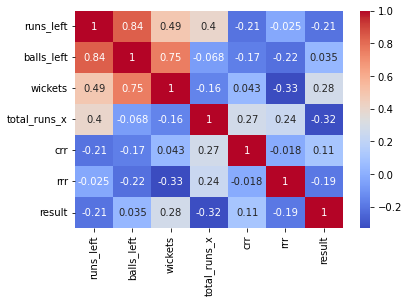

In [61]:
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [62]:
## from above we can conclude that our data is not highly correlated . So there is very no chance of multi collinearity.

### Outliers

In [63]:
final_df.describe(percentiles=[0.01,0.03,0.5,0.95,0.97,0.98]).T

,count,mean,std,min,1%,3%,50%,95%,97%,98%,max
runs_left,71342.0,93.621065,49.957572,-15.0,2.000000,9.000000,93.0,176.000000,186.000000,192.0,250.0
balls_left,71342.0,62.878725,33.259471,-2.0,3.000000,6.000000,64.0,114.000000,116.000000,117.0,119.0
wickets,71342.0,7.553251,2.124334,0.0,1.000000,3.000000,8.0,10.000000,10.000000,10.0,10.0
total_runs_x,71342.0,166.726963,29.294967,66.0,93.000000,111.000000,166.0,214.000000,224.000000,231.0,251.0
crr,71342.0,7.447791,2.280498,0.0,0.000000,3.000000,7.5,10.778712,11.454545,12.0,42.0
rrr,71342.0,10.568474,14.041845,-516.0,0.857143,2.926829,9.0,19.241075,25.090909,32.0,684.0
result,71342.0,0.457893,0.498227,0.0,0.000000,0.000000,0.0,1.000000,1.000000,1.0,1.0


### Here we are not removing outliers purposely because we required the whole data ball by ball

In [65]:
## Categorical columns
df_cat = [i for i in final_df.columns if final_df[i].dtypes=='object']
print(df_cat)

['batting_team', 'bowling_team', 'city']


In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [67]:
X = final_df.drop('result',axis=1)
y = final_df.iloc[:,-1]
print(X.shape)
print(y.shape)


(71342, 9)
(71342,)


## Apply train test split

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [75]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
56646,Rajasthan Royals,Mumbai Indians,Mumbai,46,66,10,134,9.777778,4.181818
105586,Royal Challengers Bangalore,Chennai Super Kings,Bangalore,96,48,6,182,7.166667,12.000000
114520,Sunrisers Hyderabad,Royal Challengers Bangalore,Bangalore,60,11,4,228,9.247706,32.727273
42482,Rajasthan Royals,Kings XI Punjab,Jaipur,126,103,10,154,9.882353,7.339806
147180,Delhi Capitals,Chennai Super Kings,Chennai,91,27,1,187,6.193548,20.222222
...,...,...,...,...,...,...,...,...,...
99048,Chennai Super Kings,Royal Challengers Bangalore,Bangalore,91,84,9,155,10.666667,6.500000
2632,Kings XI Punjab,Sunrisers Hyderabad,Hyderabad,70,35,4,160,6.352941,12.000000
36846,Delhi Capitals,Sunrisers Hyderabad,Cuttack,130,88,9,172,7.875000,8.863636
133964,Mumbai Indians,Delhi Capitals,Delhi,104,58,5,187,8.032258,10.758621


## Model

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score,roc_curve,accuracy_score

In [117]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(max_iter=2000))
])

In [118]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(max_iter=2000))])

In [119]:
y_pred = pipe.predict(X_test)
print(y_pred)

[1 0 1 ... 0 1 1]


In [120]:
pipe.predict_proba(X_test)[20]

array([0.69813189, 0.30186811])

In [121]:
def gen_metrics(model,X_train,X_test,y_train,y_test,y_pred):
    print('Training score',model.score(X_train,y_train))
    print('Testing score',model.score(X_test,y_test))
    cm = confusion_matrix(y_test,y_pred)
    print(cm)
    print(classification_report(y_test,y_pred))

In [122]:
gen_metrics(pipe,X_train,X_test,y_train,y_test,y_pred)

Training score 0.8165682546913602
Testing score 0.8156142686943724
[[6442 1351]
 [1280 5196]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      7793
           1       0.79      0.80      0.80      6476

    accuracy                           0.82     14269
   macro avg       0.81      0.81      0.81     14269
weighted avg       0.82      0.82      0.82     14269



In [123]:
from sklearn.metrics import roc_auc_score,roc_curve

In [124]:
auc_score = roc_auc_score(y_test,pipe.predict_proba(X_test)[:,1])
print('Area Under Curve',auc_score)

Area Under Curve 0.8981720065686671


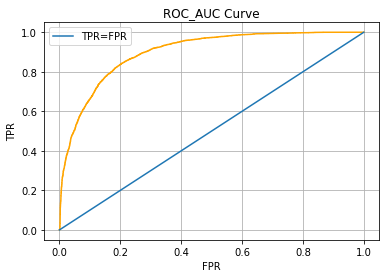

In [125]:
fpr,tpr,thresh = roc_curve(y_test,pipe.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,color='orange')
plt.plot([0,1],[0,1],label='TPR=FPR')
plt.title('ROC_AUC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.legend()
plt.show()

In [ ]:
## Here create a function to get the match overview over by over

In [126]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [127]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [128]:
temp_df,target = match_progression(delivery_df,69,pipe)
temp_df

Target- 183


,end_of_over,runs_after_over,wickets_in_over,lose,win
9298,1,2,0,64.2,35.8
9304,2,12,0,56.8,43.2
9311,3,4,2,81.4,18.6
9317,4,3,0,82.4,17.6
9324,5,13,0,75.9,24.1
9330,6,5,0,75.5,24.5
9336,7,6,0,74.2,25.8
9343,8,15,0,63.5,36.5
9350,9,5,1,75.6,24.4
9356,10,2,1,86.6,13.4


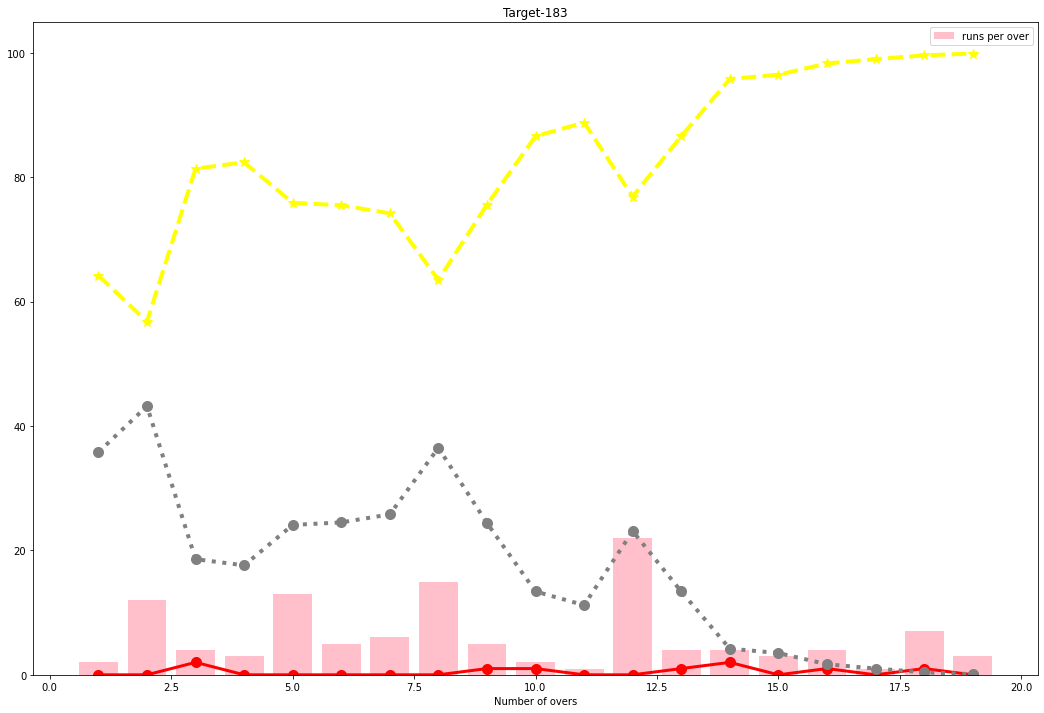

In [129]:
plt.figure(figsize=(18,12))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='red',linewidth=3,marker='o',markersize=10)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='grey',linestyle=':',linewidth=4,marker='o',markersize=10)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='yellow',linestyle='--',linewidth=4,marker='*',markersize=10)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'],color='pink',label='runs per over')
plt.title('Target-' + str(target))
plt.xlabel("Number of overs")
plt.legend()
plt.show()

In [130]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [131]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [132]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))